# 필요한 모듈을 가져오고 데이터를 로드합니다

In [7]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from datetime import timedelta
from tqdm import tqdm
sns.set()
tf.compat.v1.random.set_random_seed(1234)

In [9]:
# 예측할 종목은 한양증권(001750) 입니다

df = pd.read_csv('C:\Jupyter_Project\Hanyang_Securities_F.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6300,7100,6300,7000,1619.266357,56800
1,2000-01-05,6700,7100,6610,6700,1549.868774,52100
2,2000-01-06,7000,7000,6250,6300,1457.339844,64900
3,2000-01-07,6350,6600,6300,6370,1473.532349,61800
4,2000-01-10,6610,6700,6300,6500,1503.603882,56100


In [10]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5181,2021-02-01,9200,9480,9100,9380,9380.0,81355
5182,2021-02-02,9460,9810,9460,9700,9700.0,105755
5183,2021-02-03,9850,10200,9800,9990,9990.0,170966
5184,2021-02-04,10100,10200,9940,10150,10150.0,133504
5185,2021-02-05,10200,10800,10150,10650,10650.0,247224


In [11]:
# OHLC를 Adj OHLC로 바꾸기 위한 비율입니다
# Adj OHLC는 과거의 절대가격을 현재 가격의 시점으로 보기위한 수정된 가격입니다
# 과거 발생한 액면분할과 현금배당을 반영한 Adj Close를 기준으로 조정합니다

ratio = df['Adj Close']/df['Close']
ratio

0       0.231324
1       0.231324
2       0.231324
3       0.231324
4       0.231324
5       0.231324
6       0.231324
7       0.231324
8       0.231324
9       0.231324
10      0.231324
11      0.231324
12      0.231324
13      0.231324
14      0.231324
15      0.231324
16      0.231324
17      0.231324
18      0.231324
19      0.231324
20      0.231324
21      0.231324
22      0.231324
23      0.231324
24      0.231324
25      0.231324
26      0.231324
27      0.231324
28      0.231324
29      0.231324
          ...   
5156    1.000000
5157    1.000000
5158    1.000000
5159    1.000000
5160    1.000000
5161    1.000000
5162    1.000000
5163    1.000000
5164    1.000000
5165    1.000000
5166    1.000000
5167    1.000000
5168    1.000000
5169    1.000000
5170    1.000000
5171    1.000000
5172    1.000000
5173    1.000000
5174    1.000000
5175    1.000000
5176    1.000000
5177    1.000000
5178    1.000000
5179    1.000000
5180    1.000000
5181    1.000000
5182    1.000000
5183    1.0000

In [12]:
df['Adj Open'] = df['Open']*ratio
df['Adj High'] = df['High']*ratio
df['Adj Low'] = df['Low']*ratio

In [13]:
df.drop(['Open','High','Low','Close'], axis=1, inplace=True)

In [14]:
df.rename(columns={'Adj Open':'Open', 'Adj High':'High', 'Adj Low':'Low', 'Adj Close':'Close'}, inplace=True)

In [15]:
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

df

,Open,High,Low,Close,Volume
0,1457.339721,1642.398734,1457.339721,1619.266357,56800
1,1549.868774,1642.398253,1529.049641,1549.868774,52100
2,1619.266493,1619.266493,1445.773655,1457.339844,64900
3,1468.905874,1526.736814,1457.339686,1473.532349,61800
4,1529.049486,1549.868617,1457.339147,1503.603882,56100
5,1457.339595,1515.170531,1445.773407,1459.652832,41900
6,1457.339446,1482.785055,1413.387939,1413.387939,30400
7,1450.399667,1450.399667,1411.074636,1445.773193,56800
8,1457.339413,1480.471785,1369.436401,1369.436401,25500
9,1387.942408,1434.207155,1364.810034,1376.376221,34700


In [17]:
minmax = MinMaxScaler().fit(df.iloc[:, 4:5].astype('float32')) # Close index
df_log = minmax.transform(df.iloc[:, 4:5].astype('float32')) # Close index
df_log = pd.DataFrame(df_log)
df_log.head()

,0
0,0.020301
1,0.018620
2,0.023197
3,0.022088
4,0.020050


In [18]:
TEST_SIZE = 30
simulation_size = 10

df_train = df_log.iloc[:-TEST_SIZE]
df_test = df_log.iloc[-TEST_SIZE:]
df.shape, df_train.shape, df_test.shape

((5186, 5), (5156, 1), (30, 1))

In [19]:
df_train

,0
0,0.020301
1,0.018620
2,0.023197
3,0.022088
4,0.020050
5,0.014973
6,0.010862
7,0.020301
8,0.009110
9,0.012399


In [20]:
df_test

,0
5156,0.016599
5157,0.018961
5158,0.033227
5159,0.021489
5160,0.015658
5161,0.015459
5162,0.019957
5163,0.082220
5164,0.036241
5165,0.038448


# 딥러닝  네트워크를 학습시킵니다

In [21]:
# 모델 클레스

class Model:
    def __init__(
        self,
        learning_rate,
        num_layers,
        size,
        size_layer,
        output_size,
        forget_bias = 0.1,
    ):
        def lstm_cell(size_layer):
            return tf.nn.rnn_cell.LSTMCell(size_layer, state_is_tuple = False)

        rnn_cells = tf.nn.rnn_cell.MultiRNNCell(
            [lstm_cell(size_layer) for _ in range(num_layers)],
            state_is_tuple = False,
        )
        self.X = tf.placeholder(tf.float32, (None, None, size))
        self.Y = tf.placeholder(tf.float32, (None, output_size))
        drop = tf.contrib.rnn.DropoutWrapper(
            rnn_cells, output_keep_prob = forget_bias
        )
        self.hidden_layer = tf.placeholder(
            tf.float32, (None, num_layers * 2 * size_layer)
        )
        self.outputs, self.last_state = tf.nn.dynamic_rnn(
            drop, self.X, initial_state = self.hidden_layer, dtype = tf.float32
        )
        self.logits = tf.layers.dense(self.outputs[-1], output_size)
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(
            self.cost
        )
        
# accuracy 계산하는 법 - RMSE       
        
def calculate_accuracy(real, predict):
    real = np.array(real) + 1
    predict = np.array(predict) + 1
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    return percentage * 100

def anchor(signal, weight):
    buffer = []
    last = signal[0]
    for i in signal:
        smoothed_val = last * weight + (1 - weight) * i
        buffer.append(smoothed_val)
        last = smoothed_val
    return buffer

In [22]:
num_layers = 1
size_layer = 128
timestamp = 5
epoch = 300
dropout_rate = 0.8
future_day = TEST_SIZE
learning_rate = 0.01

In [23]:
def forecast():
    tf.reset_default_graph()
    modelnn = Model(
        learning_rate, num_layers, df_log.shape[1], size_layer, df_log.shape[1], dropout_rate
    )
    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    date_ori = pd.to_datetime(df.iloc[:, 0]).tolist()

    pbar = tqdm(range(epoch), desc = 'train loop')
    for i in pbar:
        init_value = np.zeros((1, num_layers * 2 * size_layer))
        total_loss, total_acc = [], []
        for k in range(0, df_train.shape[0] - 1, timestamp):
            index = min(k + timestamp, df_train.shape[0] - 1)
            batch_x = np.expand_dims(
                df_train.iloc[k : index, :].values, axis = 0
            )
            batch_y = df_train.iloc[k + 1 : index + 1, :].values
            logits, last_state, _, loss = sess.run(
                [modelnn.logits, modelnn.last_state, modelnn.optimizer, modelnn.cost],
                feed_dict = {
                    modelnn.X: batch_x,
                    modelnn.Y: batch_y,
                    modelnn.hidden_layer: init_value,
                },
            )        
            init_value = last_state
            total_loss.append(loss)
            total_acc.append(calculate_accuracy(batch_y[:, 0], logits[:, 0]))
        pbar.set_postfix(cost = np.mean(total_loss), acc = np.mean(total_acc))
    
    future_day = TEST_SIZE

    output_predict = np.zeros((df_train.shape[0] + future_day, df_train.shape[1]))
    output_predict[0] = df_train.iloc[0]
    upper_b = (df_train.shape[0] // timestamp) * timestamp
    init_value = np.zeros((1, num_layers * 2 * size_layer))

    for k in range(0, (df_train.shape[0] // timestamp) * timestamp, timestamp):
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(
                    df_train.iloc[k : k + timestamp], axis = 0
                ),
                modelnn.hidden_layer: init_value,
            },
        )
        init_value = last_state
        output_predict[k + 1 : k + timestamp + 1] = out_logits

    if upper_b != df_train.shape[0]:
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(df_train.iloc[upper_b:], axis = 0),
                modelnn.hidden_layer: init_value,
            },
        )
        output_predict[upper_b + 1 : df_train.shape[0] + 1] = out_logits
        future_day -= 1
        date_ori.append(date_ori[-1] + timedelta(days = 1))

    init_value = last_state
    
    for i in range(future_day):
        o = output_predict[-future_day - timestamp + i:-future_day + i]
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(o, axis = 0),
                modelnn.hidden_layer: init_value,
            },
        )
        init_value = last_state
        output_predict[-future_day + i] = out_logits[-1]
        date_ori.append(date_ori[-1] + timedelta(days = 1))
    
    output_predict = minmax.inverse_transform(output_predict)
    deep_future = anchor(output_predict[:, 0], 0.3)
    
    return deep_future[-TEST_SIZE:]

In [24]:
results = []
for i in range(simulation_size):
    print('simulation %d'%(i + 1))
    results.append(forecast())

simulation 1
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.Dense instead.
Instructions

train loop: 100%|████████████████████████████████████████████| 300/300 [17:16<00:00,  3.46s/it, acc=98.5, cost=0.00101]


simulation 2


train loop: 100%|███████████████████████████████████████████| 300/300 [18:33<00:00,  3.71s/it, acc=98.5, cost=0.000986]


simulation 3


train loop: 100%|███████████████████████████████████████████| 300/300 [17:39<00:00,  3.53s/it, acc=98.6, cost=0.000997]


simulation 4


train loop: 100%|███████████████████████████████████████████| 300/300 [18:36<00:00,  3.72s/it, acc=98.5, cost=0.000981]


simulation 5


train loop: 100%|███████████████████████████████████████████| 300/300 [18:44<00:00,  3.75s/it, acc=98.6, cost=0.000945]


simulation 6


train loop: 100%|███████████████████████████████████████████| 300/300 [20:26<00:00,  4.09s/it, acc=98.5, cost=0.000988]


simulation 7


train loop: 100%|███████████████████████████████████████████| 300/300 [20:08<00:00,  4.03s/it, acc=98.5, cost=0.000976]


simulation 8


train loop: 100%|████████████████████████████████████████████| 300/300 [17:38<00:00,  3.53s/it, acc=98.4, cost=0.00101]


simulation 9


train loop: 100%|███████████████████████████████████████████| 300/300 [21:53<00:00,  4.38s/it, acc=98.6, cost=0.000988]


simulation 10


train loop: 100%|████████████████████████████████████████████| 300/300 [17:41<00:00,  3.54s/it, acc=98.6, cost=0.00097]


# Visualize
> vr.1,2 모델과는 다른 예측기법이 적용되었습니다. 실값(true trend)과 10개의 예측모델(forcast 1~10)이 그래프 상에 나열되어 있기 때문에 차트를 추종하는지의 여부는 확인하기 어렵지만 model loss만을 측정하는 앞선 두 모델과는 달리 average accurracy(정확도)를 측정하는데에 의의가 있다고 생각합니다

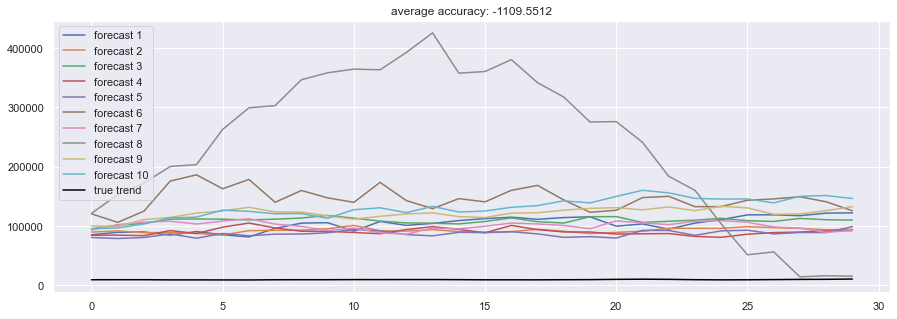

In [25]:
accuracies = [calculate_accuracy(df['Close'].iloc[-TEST_SIZE:].values, r) for r in results]

plt.figure(figsize = (15, 5))
for no, r in enumerate(results):
    plt.plot(r, label = 'forecast %d'%(no + 1))
plt.plot(df['Close'].iloc[-TEST_SIZE:].values, label = 'true trend', c = 'black')
plt.legend()
plt.title('average accuracy: %.4f'%(np.mean(accuracies)))
plt.show()